<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho_final/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passos requeridos para o trabalho:
- Abrir o conjunto de dados em um DataFrame, 
- Visualizar os dados por meio de gráficos construídos com uma das bibliotecas gráficas vistas na disciplina,
- Utilizar aprendizado de máquina não supervisionado e/ou supervisionado para construir um modelo que seja capaz de prever uma propriedade de interesse.

In [255]:
#https://www.openml.org/

dataset = 'credit-g'
from sklearn.datasets import fetch_openml
risk_dataset = fetch_openml(name=dataset,version='1')
print(risk_dataset.data.shape)

(1000, 20)


In [256]:
print(risk_dataset.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of the existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. P

In [257]:
import pandas as pd
df = pd.DataFrame(risk_dataset.data)
df.columns = risk_dataset.feature_names
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [258]:
# Converter target para valores numéricos

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# categories = risk_dataset.target.unique()
# encoder.fit(categories)
target = encoder.fit_transform(risk_dataset.target)
target


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [259]:
# Converter dados para valores numéricos

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data = encoder.fit_transform(risk_dataset.data)
data

array([[ 1.,  2.,  1., ...,  0.,  1.,  1.],
       [ 0., 29.,  3., ...,  0.,  0.,  1.],
       [ 3.,  8.,  1., ...,  1.,  0.,  1.],
       ...,
       [ 3.,  8.,  3., ...,  0.,  0.,  1.],
       [ 1., 27.,  3., ...,  0.,  1.,  1.],
       [ 0., 27.,  1., ...,  0.,  0.,  1.]])

In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.46, -1.56, -1.15, ..., -0.43,  1.21,  0.2 ],
       [-1.26,  2.03,  0.73, ..., -0.43, -0.82,  0.2 ],
       [ 1.13, -0.76, -1.15, ...,  2.33, -0.82,  0.2 ],
       ...,
       [ 1.13, -0.76,  0.73, ..., -0.43, -0.82,  0.2 ],
       [-0.46,  1.77,  0.73, ..., -0.43,  1.21,  0.2 ],
       [-1.26,  1.77, -1.15, ..., -0.43, -0.82,  0.2 ]])

In [261]:
df = pd.DataFrame(data)
df.columns = risk_dataset.feature_names
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,-0.464594,-1.558464,-1.146212,0.626481,-1.156695,1.669901,1.097762,0.918477,0.830971,0.301109,1.046987,1.333473,2.788510,0.218346,-0.133710,1.027079,-0.289639,-0.428290,1.214598,0.196014
1,-1.262865,2.032467,0.734365,0.626481,1.217641,-0.130531,-1.134975,-0.870183,-1.390876,0.301109,-0.765977,1.333473,-1.197733,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
2,1.131948,-0.760479,-1.146212,-1.026504,-0.219059,-0.130531,-0.390729,-0.870183,0.830971,0.301109,0.140505,1.333473,1.194013,0.218346,-0.133710,-0.704926,1.824516,2.334869,-0.823318,0.196014
3,-0.464594,1.633475,0.734365,-0.613257,1.512543,-0.130531,-0.390729,-0.870183,0.830971,-1.945974,1.046987,-0.318910,0.839680,0.218346,-2.016956,-0.704926,-0.289639,2.334869,-0.823318,0.196014
4,-0.464594,0.436498,-0.205923,-0.200011,1.081533,-0.130531,-1.134975,0.024147,0.830971,0.301109,1.046987,0.507281,1.548345,0.218346,-2.016956,1.027079,-0.289639,2.334869,-0.823318,0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.131948,-0.760479,0.734365,-0.613257,-0.521522,-0.130531,-0.390729,0.024147,-1.390876,0.301109,1.046987,1.333473,-0.400485,0.218346,-0.133710,-0.704926,1.824516,-0.428290,-0.823318,0.196014
996,-0.464594,0.968487,0.734365,1.866220,0.805535,-0.130531,-1.134975,0.918477,-0.650260,0.301109,1.046987,-0.318910,0.396764,0.218346,-0.133710,-0.704926,-1.346717,-0.428290,1.214598,0.196014
997,1.131948,-0.760479,0.734365,0.626481,-1.432692,-0.130531,1.097762,0.918477,0.830971,0.301109,1.046987,-1.145101,0.219598,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
998,-0.464594,1.766472,0.734365,0.626481,-0.438345,-0.130531,-1.134975,0.918477,0.830971,0.301109,1.046987,0.507281,-1.109150,0.218346,-2.016956,-0.704926,-0.289639,-0.428290,1.214598,0.196014


In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier(n_neighbors=5)
knn = GridSearchCV(clf,{'n_neighbors':range(1,9)},cv=30)
knn.fit(data,target)
print(knn.score(data,target))
print(knn.best_params_)

0.809
{'n_neighbors': 5}


In [263]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(data,target)
print(clf.score(data,target))
print(clf.predict_proba(data))

0.809
[[0.  1. ]
 [0.4 0.6]
 [0.2 0.8]
 ...
 [0.  1. ]
 [0.4 0.6]
 [0.2 0.8]]


In [264]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 1.13,  0.44, -0.21, ..., -0.43, -0.82,  0.2 ],
        [ 1.13,  2.03, -2.09, ..., -0.43, -0.82,  0.2 ],
        [ 1.13, -0.76, -1.15, ..., -0.43,  1.21,  0.2 ],
        ...,
        [ 1.13, -1.16,  0.73, ..., -0.43, -0.82,  0.2 ],
        [-1.26, -0.1 , -1.15, ..., -0.43, -0.82,  0.2 ],
        [-1.26,  1.23, -0.21, ...,  2.33,  1.21,  0.2 ]]),
 array([[-0.46,  1.23,  0.73, ..., -0.43,  1.21,  0.2 ],
        [ 1.13, -1.16,  0.73, ...,  2.33, -0.82, -5.1 ],
        [ 1.13, -0.1 ,  0.73, ..., -0.43,  1.21,  0.2 ],
        ...,
        [ 1.13, -0.76, -1.15, ...,  2.33, -0.82,  0.2 ],
        [-1.26, -0.76,  0.73, ..., -0.43, -0.82,  0.2 ],
        [ 1.13, -1.56,  0.73, ..., -0.43, -0.82,  0.2 ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [265]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

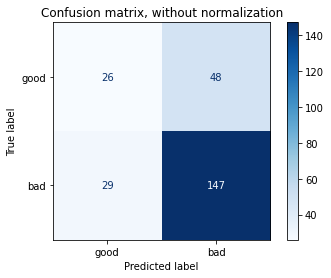

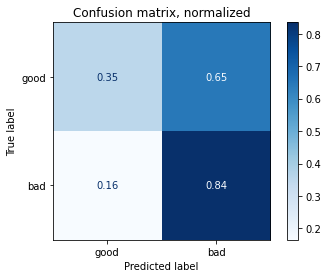

In [266]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

class_names = risk_dataset.target.unique()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Confusion matrix, normalized", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()